<a href="https://colab.research.google.com/github/rmcelfresh/IST718Lab6/blob/master/McElfresh_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

McElfresh, Reed  
IST 718: Big Data Analytics--Lab 6




In [0]:
!pip install -q xlrd
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline


In [2]:
#Grabbing my GitHub For this assignment
!git clone https://github.com/rmcelfresh/IST718Lab6/

Cloning into 'IST718Lab6'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [0]:
ZillowBase = pd.read_csv("http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv", encoding='latin-1')
ZillowBaseBackUp = pd.read_csv("http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv", encoding='latin-1')

In [4]:
#ZHVI is Zillow Home Value Index-- tacks monthy median home values in a particular geographic region

ZillowBase.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,342300.0,343400.0,344900.0,346200.0,347000.0,347900.0,349100.0,350400.0,352000.0,353800.0,356100.0,358700.0,361600.0,365400.0,370000.0,374400.0,378700.0,383300.0,388100.0,393100.0,398300.0,403600.0,409000.0,414500.0,420000.0,426100.0,...,952800,959300,966100,968600,971300,972400,970200,971800,978400,986200,993700,998300,997100,994300,991300,987900,989500,997900,1005100,1008300,1009600,1012200,1016500,1022600,1029000,1034500,1036700,1036600,1038800,1040900,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,327400,326900,327300,328900,329900,329800,328700,327400,326400,325500,324800,324800,323800,322200,320900,320400,320200,320700,320700,320100,319900,320400,320900,321100,322800,326600,330400,332600,334400,335700,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,504700.0,503700.0,503200.0,501900.0,499500.0,497500.0,495900.0,494800.0,494400.0,494800.0,496000.0,498400.0,501900.0,507600.0,514700.0,522100.0,529400.0,537900.0,547000.0,556500.0,566100.0,575700.0,584800.0,593500.0,601600.0,610100.0,...,1230200,1234900,1240100,1243300,1244100,1244400,1243400,1243400,1245500,1251600,1259900,1266900,1271800,1275900,1279000,1280800,1284100,1288000,1290100,1289300,1290400,1295700,1301700,1304500,1309700,1314900,1317300,1319400,1322700,1321600,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,...,156000,157700,159400,161600,164100,166100,167400,168200,168500,168600,168600,168500,168200,167700,167200,166900,166900,166800,166800,167400,168400,169700,170900,172200,173400,174300,175200,176300,176800,176900,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,116100,115600,115000,114600,114200,114100,114100,113900,114100,114800,115700,116200,116800,117300,117700,118100,118700,119000,119200,119500,119900,120300,120300,120200,120200,120400,120600,121200,122200,123000,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


In [5]:
ZillowBase=ZillowBase.rename({'RegionName':'ZipCode'}, axis='columns')
 
ZillowBase.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,342300.0,343400.0,344900.0,346200.0,347000.0,347900.0,349100.0,350400.0,352000.0,353800.0,356100.0,358700.0,361600.0,365400.0,370000.0,374400.0,378700.0,383300.0,388100.0,393100.0,398300.0,403600.0,409000.0,414500.0,420000.0,426100.0,...,952800,959300,966100,968600,971300,972400,970200,971800,978400,986200,993700,998300,997100,994300,991300,987900,989500,997900,1005100,1008300,1009600,1012200,1016500,1022600,1029000,1034500,1036700,1036600,1038800,1040900,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,327400,326900,327300,328900,329900,329800,328700,327400,326400,325500,324800,324800,323800,322200,320900,320400,320200,320700,320700,320100,319900,320400,320900,321100,322800,326600,330400,332600,334400,335700,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,504700.0,503700.0,503200.0,501900.0,499500.0,497500.0,495900.0,494800.0,494400.0,494800.0,496000.0,498400.0,501900.0,507600.0,514700.0,522100.0,529400.0,537900.0,547000.0,556500.0,566100.0,575700.0,584800.0,593500.0,601600.0,610100.0,...,1230200,1234900,1240100,1243300,1244100,1244400,1243400,1243400,1245500,1251600,1259900,1266900,1271800,1275900,1279000,1280800,1284100,1288000,1290100,1289300,1290400,1295700,1301700,1304500,1309700,1314900,1317300,1319400,1322700,1321600,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,...,156000,157700,159400,161600,164100,166100,167400,168200,168500,168600,168600,168500,168200,167700,167200,166900,166900,166800,166800,167400,168400,169700,170900,172200,173400,174300,175200,176300,176800,176900,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,116100,115600,115000,114600,114200,114100,114100,113900,114100,114800,115700,116200,116800,117300,117700,118100,118700,119000,119200,119500,119900,120300,120300,120200,120200,120400,120600,121200,122200,123000,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


Each Zillow Home Value Index (ZHVI) is a time series tracking the monthly median home value in a particular geographical region. In general, each ZHVI time series begins in April 1996. We generate the ZHVI at seven geographic levels: neighborhood, ZIP code, city, congressional district, county, metropolitan area, state and the nation.

https://www.zillow.com/research/zhvi-methodology-6032/

In [0]:
RegionPivot= pd.pivot_table(ZillowBase, values='2019-03', columns='Metro', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
RegionPivot=pd.DataFrame.transpose(RegionPivot)
#print(RegionPivot)



In [0]:
ARZillow = ZillowBase.loc[ZillowBase['State'] == 'AR']

In [0]:
#ARZillow

In [0]:
ARMetrosZillow = ARZillow.loc[ARZillow['Metro'].isin(['Little Rock-North Little Rock-Conway', 'Searcy', 'Fayetteville-Springdale-Rogers', 'Hot Springs'])]



In [0]:
#ARMetrosZillow

In [11]:
ARPivot= pd.pivot_table(ARMetrosZillow, values=('1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03'), columns='Metro', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
ARPivot=pd.DataFrame.transpose(ARPivot)
(ARPivot)


,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,...,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
Metro,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fayetteville-Springdale-Rogers,82552.631579,83236.842105,83921.052632,84557.894737,85031.578947,85321.052632,85431.578947,85368.421053,85200.0,84973.684211,84652.631579,84300.000000,84042.105263,83842.105263,83621.052632,83326.315789,83000.0,82652.631579,82331.578947,82068.421053,81894.736842,81878.947368,81921.052632,82052.631579,82373.684211,82868.421053,83405.263158,83968.421053,84473.684211,84894.736842,85284.210526,85668.421053,86094.736842,86600.000000,87136.842105,87784.210526,88621.052632,89647.368421,90752.631579,91847.368421,...,143361.904762,144328.571429,145352.380952,146328.571429,147552.380952,148828.571429,149928.571429,151176.190476,152285.714286,153328.571429,154552.380952,155790.476190,156852.380952,157900.000000,158904.761905,160076.190476,161414.285714,162857.142857,164447.619048,165571.428571,166133.333333,166795.238095,167295.238095,167390.476190,167490.476190,168633.333333,170833.333333,173090.476190,174585.714286,175742.857143,176566.666667,177400.000000,178285.714286,179590.476190,181185.714286,182771.428571,183976.190476,184852.380952,185566.666667,186333.333333
Hot Springs,72150.000000,72300.000000,72400.000000,72550.000000,72825.000000,73175.000000,73550.000000,74000.000000,74475.0,75000.000000,75475.000000,76050.000000,76675.000000,77275.000000,77750.000000,78250.000000,78700.0,79125.000000,79475.000000,79775.000000,80050.000000,80300.000000,80500.000000,80725.000000,80950.000000,81175.000000,81325.000000,81475.000000,81675.000000,81850.000000,82125.000000,82400.000000,82725.000000,83150.000000,83525.000000,84050.000000,84650.000000,85175.000000,85625.000000,86000.000000,...,132300.000000,132525.000000,132650.000000,132575.000000,132625.000000,132825.000000,133000.000000,132975.000000,133350.000000,134300.000000,135400.000000,136025.000000,137100.000000,138775.000000,140100.000000,139900.000000,139025.000000,138775.000000,139800.000000,140650.000000,140700.000000,140850.000000,141375.000000,141700.000000,141200.000000,140400.000000,140625.000000,141775.000000,142150.000000,142200.000000,142900.000000,144125.000000,145100.000000,146000.000000,146625.000000,146875.000000,147400.000000,148050.000000,148050.000000,147900.000000
Little Rock-North Little Rock-Conway,85206.666667,85733.333333,86260.000000,86823.333333,87360.000000,87866.666667,88336.666667,88756.666667,89140.0,89470.000000,89733.333333,90016.666667,90343.333333,90670.000000,90893.333333,91080.000000,91230.0,91370.000000,91520.000000,91680.000000,91873.333333,92106.666667,92330.000000,92620.000000,92990.000000,93410.000000,93733.333333,94010.000000,94220.000000,94373.333333,94483.333333,94583.333333,94703.333333,94883.333333,95103.333333,95476.666667,96036.666667,96690.000000,97306.666667,97900.000000,...,147763.333333,148333.333333,148910.000000,149433.333333,149883.333333,150193.333333,150513.333333,150923.333333,151353.333333,151883.333333,152520.000000,153276.666667,154253.333333,155073.333333,155776.666667,156716.666667,157756.666667,158506.666667,159196.666667,159813.333333,160200.000000,160413.333333,160226.666667,159723.333333,159450.000000,159866.666667,160660.000000,161246.666667,161590.000000,162293.333333,163043.333333,163540.000000,163873.333333,164376.666667,164986.666667,165723.333333,166263.333333,166596.6

In [0]:
ARPivot1=pd.DataFrame.transpose(ARPivot)

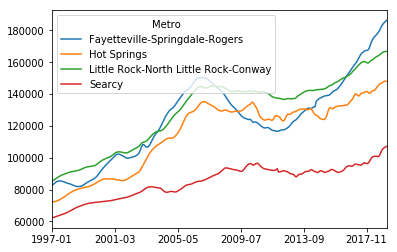

In [13]:
#ARPivot1
from pandas import Series
from matplotlib import pyplot
series = ARPivot1
series.plot()
pyplot.show()

In [0]:
#for col in ARMetrosZillow.columns: 
#    print(col)

In [0]:
to_drop = ['RegionID','City','Metro', 'CountyName']
ZillowBase.drop(columns=to_drop, inplace=True, axis=0)

In [16]:
ZillowBase.head()

,ZipCode,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,60657,IL,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,342300.0,343400.0,344900.0,346200.0,347000.0,347900.0,349100.0,350400.0,352000.0,353800.0,356100.0,358700.0,361600.0,365400.0,370000.0,374400.0,378700.0,383300.0,388100.0,393100.0,398300.0,403600.0,409000.0,414500.0,420000.0,426100.0,432500.0,438500.0,444100.0,450000.0,...,952800,959300,966100,968600,971300,972400,970200,971800,978400,986200,993700,998300,997100,994300,991300,987900,989500,997900,1005100,1008300,1009600,1012200,1016500,1022600,1029000,1034500,1036700,1036600,1038800,1040900,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,77494,TX,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,277000.0,283600.0,288500.0,293900.0,...,327400,326900,327300,328900,329900,329800,328700,327400,326400,325500,324800,324800,323800,322200,320900,320400,320200,320700,320700,320100,319900,320400,320900,321100,322800,326600,330400,332600,334400,335700,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,60614,IL,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,504700.0,503700.0,503200.0,501900.0,499500.0,497500.0,495900.0,494800.0,494400.0,494800.0,496000.0,498400.0,501900.0,507600.0,514700.0,522100.0,529400.0,537900.0,547000.0,556500.0,566100.0,575700.0,584800.0,593500.0,601600.0,610100.0,618400.0,625400.0,631000.0,636600.0,...,1230200,1234900,1240100,1243300,1244100,1244400,1243400,1243400,1245500,1251600,1259900,1266900,1271800,1275900,1279000,1280800,1284100,1288000,1290100,1289300,1290400,1295700,1301700,1304500,1309700,1314900,1317300,1319400,1322700,1321600,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,77449,TX,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,108400.0,110400.0,112100.0,113200.0,...,156000,157700,159400,161600,164100,166100,167400,168200,168500,168600,168600,168500,168200,167700,167200,166900,166900,166800,166800,167400,168400,169700,170900,172200,173400,174300,175200,176300,176800,176900,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,79936,TX,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,79700.0,79900.0,80100.0,80300.0,...,116100,115600,115000,114600,114200,114100,114100,113900,114100,114800,115700,116200,116800,117300,117700,118100,118700,119000,119200,119500,119900,120300,120300,120200,120200,120400,120600,121200,122200,123000,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


In [19]:
#!pip install CensusData
import censusdata

     |████████████████████████████████| 20.2MB 1.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/5d/be/76/cd3b3e552aa1207e54ff1ed15c3046e8f7531c064ce9149aba
Successfully built CensusData


In [0]:
Zip65Plus = censusdata.download ('acs5', 2015, censusdata.censusgeo([('zip code tabulation area', '*')]),
                                   ['B01001_001E', 'B01001_020E', 'B01001_021E', 'B01001_022E', 'B01001_023E',
                                    'B01001_024E', 'B01001_025E', 'B01001_044E', 'B01001_045E', 'B01001_046E',
                                    'B01001_047E', 'B01001_048E', 'B01001_049E'])

In [21]:
Zip65Plus.head()

,B01001_001E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E
"ZCTA5 23824: Summary level: 860, zip code tabulation area:23824",6984,83,138,173,60,69,83,107,105,159,147,136,157
"ZCTA5 23827: Summary level: 860, zip code tabulation area:23827",1328,26,28,11,6,1,8,17,7,34,17,6,10
"ZCTA5 23828: Summary level: 860, zip code tabulation area:23828",395,0,9,4,0,1,0,15,2,0,14,19,0
"ZCTA5 23829: Summary level: 860, zip code tabulation area:23829",2652,13,133,60,73,32,22,27,18,17,31,0,9
"ZCTA5 23830: Summary level: 860, zip code tabulation area:23830",1325,44,15,7,37,0,0,57,20,22,24,9,0


In [0]:
ZipCodePop = censusdata.download('acs5', 2015, censusdata.censusgeo([('zip code tabulation area', '*')]),
                                ['B01001_001E', 'B19013_001E', 'B19083_001E',
                                 'C17002_001E', 'C17002_002E', 'C17002_003E', 'C17002_004E',
                                 'B03002_001E', 'B03002_003E', 'B03002_004E', 'B03002_012E',])

In [0]:
#censusdata.printtable(censusdata.censustable('acs5', 2015, 'DP05'))

detail on census data package 
https://jtleider.github.io/censusdata/geographies.html

In [24]:
ZipCodePop.head()

,B01001_001E,B19013_001E,B19083_001E,C17002_001E,C17002_002E,C17002_003E,C17002_004E,B03002_001E,B03002_003E,B03002_004E,B03002_012E
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810",724,57500.0,0.3490,724,61,17,88,724,703,0,14
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811",67,-666666666.0,0.2345,67,0,0,17,67,67,0,0
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812",58,49583.0,0.1728,52,0,0,0,58,58,0,0
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814",1282,58176.0,0.4595,1282,27,24,123,1282,1152,36,32
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815",1103,60458.0,0.4183,1103,14,145,49,1103,1001,15,6


In [0]:
ZipCodePop =ZipCodePop.rename(columns={'B01001_001E': 'population_size'})
ZipCodePop =ZipCodePop.rename(columns={'B19013_001E': 'median_HH_income'})
ZipCodePop =ZipCodePop.rename(columns={'B19083_001E': 'gini_index'})
ZipCodePop['percent_below_125_poverty'] = (ZipCodePop['C17002_002E'] + ZipCodePop['C17002_003E'] + ZipCodePop['C17002_004E']) / ZipCodePop['C17002_001E'] * 100
ZipCodePop['percent_nonhisp_white'] = ZipCodePop['B03002_003E'] / ZipCodePop['B03002_001E'] * 100
ZipCodePop['percent_nonhisp_black'] = ZipCodePop['B03002_004E'] / ZipCodePop['B03002_001E'] * 100
ZipCodePop['percent_hispanic'] = ZipCodePop['B03002_012E'] / ZipCodePop['B03002_001E'] * 100

In [0]:
for column in ['C17002_001E', 'C17002_002E', 'C17002_003E', 'C17002_004E',
               'B03002_001E', 'B03002_003E', 'B03002_004E', 'B03002_012E',]:
    del ZipCodePop[column]

In [27]:
ZipCodePop.head()

,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810",724,57500.0,0.3490,22.928177,97.099448,0.000000,1.933702
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811",67,-666666666.0,0.2345,25.373134,100.000000,0.000000,0.000000
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812",58,49583.0,0.1728,0.000000,100.000000,0.000000,0.000000
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814",1282,58176.0,0.4595,13.572543,89.859594,2.808112,2.496100
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815",1103,60458.0,0.4183,18.857661,90.752493,1.359927,0.543971


In [28]:
ZipCodePop.describe()

,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
count,33120.000000,3.215700e+04,3.312000e+04,32601.000000,32810.000000,32810.000000,32810.000000
mean,9664.375151,-2.254584e+07,-1.696860e+07,20.507785,77.639380,7.484919,9.145570
std,14237.949376,1.206529e+08,1.049990e+08,14.021147,25.498529,15.750803,16.589326
min,0.000000,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000
25%,718.750000,3.809500e+04,3.731000e-01,10.847458,67.341856,0.000000,0.604306
50%,2808.000000,4.833300e+04,4.128000e-01,17.899450,88.415623,0.850715,2.908078
75%,13139.250000,6.133900e+04,4.535000e-01,27.031304,96.178344,6.154912,8.990523
max,114982.000000,2.500010e+05,7.898000e-01,100.000000,100.000000,100.000000,100.000000


In [0]:
ZipCodePop['ZipCode']=ZipCodePop.index

In [30]:
ZipCodePop.head()

,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic,ZipCode
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810",724,57500.0,0.3490,22.928177,97.099448,0.000000,1.933702,"ZCTA5 12810: Summary level: 860, zip code tabu..."
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811",67,-666666666.0,0.2345,25.373134,100.000000,0.000000,0.000000,"ZCTA5 12811: Summary level: 860, zip code tabu..."
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812",58,49583.0,0.1728,0.000000,100.000000,0.000000,0.000000,"ZCTA5 12812: Summary level: 860, zip code tabu..."
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814",1282,58176.0,0.4595,13.572543,89.859594,2.808112,2.496100,"ZCTA5 12814: Summary level: 860, zip code tabu..."
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815",1103,60458.0,0.4183,18.857661,90.752493,1.359927,0.543971,"ZCTA5 12815: Summary level: 860, zip code tabu..."


In [31]:
cols = ZipCodePop.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
ZipCodePop =ZipCodePop[cols]
ZipCodePop.head()

,ZipCode,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810","ZCTA5 12810: Summary level: 860, zip code tabu...",724,57500.0,0.3490,22.928177,97.099448,0.000000,1.933702
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811","ZCTA5 12811: Summary level: 860, zip code tabu...",67,-666666666.0,0.2345,25.373134,100.000000,0.000000,0.000000
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812","ZCTA5 12812: Summary level: 860, zip code tabu...",58,49583.0,0.1728,0.000000,100.000000,0.000000,0.000000
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814","ZCTA5 12814: Summary level: 860, zip code tabu...",1282,58176.0,0.4595,13.572543,89.859594,2.808112,2.496100
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815","ZCTA5 12815: Summary level: 860, zip code tabu...",1103,60458.0,0.4183,18.857661,90.752493,1.359927,0.543971


In [32]:
type(ZipCodePop)

pandas.core.frame.DataFrame

In [0]:
ZipCodePop['ZipCode']= ZipCodePop['ZipCode'].astype(str)

In [0]:
Left = ZipCodePop['ZipCode'].str[6:11]

Left.head()
ZipCodePop['ZipCode']= Left

In [35]:
ZipCodePop.head()

,ZipCode,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
"ZCTA5 12810: Summary level: 860, zip code tabulation area:12810",12810,724,57500.0,0.3490,22.928177,97.099448,0.000000,1.933702
"ZCTA5 12811: Summary level: 860, zip code tabulation area:12811",12811,67,-666666666.0,0.2345,25.373134,100.000000,0.000000,0.000000
"ZCTA5 12812: Summary level: 860, zip code tabulation area:12812",12812,58,49583.0,0.1728,0.000000,100.000000,0.000000,0.000000
"ZCTA5 12814: Summary level: 860, zip code tabulation area:12814",12814,1282,58176.0,0.4595,13.572543,89.859594,2.808112,2.496100
"ZCTA5 12815: Summary level: 860, zip code tabulation area:12815",12815,1103,60458.0,0.4183,18.857661,90.752493,1.359927,0.543971


In [36]:
print(ZipCodePop.dtypes)
print(ZillowBase.dtypes)

ZipCode                       object
population_size                int64
median_HH_income             float64
gini_index                   float64
percent_below_125_poverty    float64
percent_nonhisp_white        float64
percent_nonhisp_black        float64
percent_hispanic             float64
dtype: object
ZipCode       int64
State        object
SizeRank      int64
1996-04     float64
1996-05     float64
1996-06     float64
1996-07     float64
1996-08     float64
1996-09     float64
1996-10     float64
1996-11     float64
1996-12     float64
1997-01     float64
1997-02     float64
1997-03     float64
1997-04     float64
1997-05     float64
1997-06     float64
1997-07     float64
1997-08     float64
1997-09     float64
1997-10     float64
1997-11     float64
1997-12     float64
1998-01     float64
1998-02     float64
1998-03     float64
1998-04     float64
1998-05     float64
1998-06     float64
             ...   
2016-11       int64
2016-12       int64
2017-01       int64
2017-02   

In [37]:
ZipCodePop['ZipCode']= ZipCodePop['ZipCode'].astype(int)
print(ZipCodePop.dtypes)


ZipCode                        int64
population_size                int64
median_HH_income             float64
gini_index                   float64
percent_below_125_poverty    float64
percent_nonhisp_white        float64
percent_nonhisp_black        float64
percent_hispanic             float64
dtype: object


In [0]:
    result = pd.merge(ZillowBase,
                     ZipCodePop[['population_size', 'median_HH_income', 'gini_index', 'percent_below_125_poverty','percent_nonhisp_white', 'percent_nonhisp_black','percent_hispanic','ZipCode']],
                     on='ZipCode', 
                     how='left')

In [39]:
result.head()

,ZipCode,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic
0,60657,IL,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,342300.0,343400.0,344900.0,346200.0,347000.0,347900.0,349100.0,350400.0,352000.0,353800.0,356100.0,358700.0,361600.0,365400.0,370000.0,374400.0,378700.0,383300.0,388100.0,393100.0,398300.0,403600.0,409000.0,414500.0,420000.0,426100.0,432500.0,438500.0,444100.0,450000.0,...,971800,978400,986200,993700,998300,997100,994300,991300,987900,989500,997900,1005100,1008300,1009600,1012200,1016500,1022600,1029000,1034500,1036700,1036600,1038800,1040900,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100,69147.0,79638.0,0.5041,12.209319,81.562468,2.668229,6.063893
1,77494,TX,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,277000.0,283600.0,288500.0,293900.0,...,327400,326400,325500,324800,324800,323800,322200,320900,320400,320200,320700,320700,320100,319900,320400,320900,321100,322800,326600,330400,332600,334400,335700,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200,88077.0,134125.0,0.3454,3.378209,58.166150,6.279733,17.330291
2,60614,IL,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,504700.0,503700.0,503200.0,501900.0,499500.0,497500.0,495900.0,494800.0,494400.0,494800.0,496000.0,498400.0,501900.0,507600.0,514700.0,522100.0,529400.0,537900.0,547000.0,556500.0,566100.0,575700.0,584800.0,593500.0,601600.0,610100.0,618400.0,625400.0,631000.0,636600.0,...,1243400,1245500,1251600,1259900,1266900,1271800,1275900,1279000,1280800,1284100,1288000,1290100,1289300,1290400,1295700,1301700,1304500,1309700,1314900,1317300,1319400,1322700,1321600,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900,69423.0,92714.0,0.5235,12.329637,80.418593,4.357346,6.675021
3,77449,TX,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,108400.0,110400.0,112100.0,113200.0,...,168200,168500,168600,168600,168500,168200,167700,167200,166900,166900,166800,166800,167400,168400,169700,170900,172200,173400,174300,175200,176300,176800,176900,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500,106175.0,68854.0,0.3521,17.408529,26.784083,17.734872,48.451142
4,79936,TX,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,79700.0,79900.0,80100.0,80300.0,...,113900,114100,114800,115700,116200,116800,117300,117700,118100,118700,119000,119200,119500,119900,120300,120300,120200,120200,120400,120600,121200,122200,123000,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800,113887.0,51784.0,0.4264,21.081177,11.149648,1.540123,85.334586


In [0]:
taxreturnurl = "IST718Lab6/taxreturndata.csv"
taxreturdf = pd.read_csv(taxreturnurl, sep = ",")
                         
taxes=taxreturdf

data from  https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi
non agg.


In [41]:
taxes.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,...,N07230,A07230,N07240,A07240,N07220,A07220,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,25,MA,1001,0,8980,5030,2980,850,4980,15160,3910,190,40,160,0,40,850,2640,506318,8980,512546,7400,384841,3050,2761,1860,5138,1730,3760,2020,1257,1060,14268,1290,6978,1180,14653,2090,46469,0,...,600,734,430,74,1210,1491,230,142,870,2508,250,486,320,629,180,109,8570,70725,980,1869,790,1541,530,689,510,485,110,62,6950,54650,7240,57716,70,61,70,89,1490,4489,7120,16852
1,25,MA,1002,0,9490,5090,3530,750,4620,16220,4130,320,210,110,80,40,700,3120,799175,9490,817846,7590,463995,4400,7172,3290,35049,3110,28179,1960,2016,2180,49920,2940,36686,1480,27390,2140,86977,30,...,950,889,440,93,860,983,320,875,1800,7145,370,829,410,876,150,89,8970,139526,1010,1762,830,1521,490,618,610,579,180,142,7090,115417,7490,124371,350,478,440,913,2240,11389,6500,20502
2,25,MA,1003,0,170,170,0,0,20,110,0,0,0,0,0,0,0,0,2435,170,2474,170,2261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,269,0,0,0,0,0,0,30,24,0,0,70,144,70,149,0,0,0,0,0,0,160,127
3,25,MA,1005,0,2370,1170,950,210,1270,4400,1240,0,0,0,0,0,280,640,137832,2370,139610,2060,107576,870,518,410,1030,410,757,550,285,330,5811,310,1690,250,2916,490,11024,0,...,170,200,110,18,360,526,80,96,260,846,70,130,90,142,60,32,2280,18354,250,437,200,365,130,161,140,130,30,25,1860,13818,1940,14844,0,0,0,0,450,1388,1860,4703
4,25,MA,1007,0,7580,3490,3330,620,3890,14240,4090,120,20,100,0,30,600,2020,556668,7580,564832,6460,423686,3310,2375,1700,6137,1590,4555,2150,1381,1160,17021,1300,8542,770,11112,1650,42872,60,...,630,805,310,62,1160,1475,280,565,940,3128,200,441,250,475,120,61,7270,81039,640,1193,530,999,350,389,470,463,110,84,6060,68029,6300,71769,150,160,150,121,1370,5167,5860,15787


In [0]:
to_drop = ['STATEFIPS','STATE','AGI_STUB']
taxes.drop(columns=to_drop, inplace=True, axis=0)

In [0]:
taxes=taxes.loc[:, "ZIPCODE":"A00300"] 

In [0]:
taxes['ZipCode']=taxes['ZIPCODE']


In [56]:
taxes.head()

,ZIPCODE,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,ZipCode
0,1001,8980,5030,2980,850,4980,15160,3910,190,40,160,0,40,850,2640,506318,8980,512546,7400,384841,3050,2761,1001
1,1002,9490,5090,3530,750,4620,16220,4130,320,210,110,80,40,700,3120,799175,9490,817846,7590,463995,4400,7172,1002
2,1003,170,170,0,0,20,110,0,0,0,0,0,0,0,0,2435,170,2474,170,2261,0,0,1003
3,1005,2370,1170,950,210,1270,4400,1240,0,0,0,0,0,280,640,137832,2370,139610,2060,107576,870,518,1005
4,1007,7580,3490,3330,620,3890,14240,4090,120,20,100,0,30,600,2020,556668,7580,564832,6460,423686,3310,2375,1007


In [57]:
cols = taxes.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
taxes =taxes[cols]
taxes.head()

,ZipCode,ZIPCODE,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300
0,1001,1001,8980,5030,2980,850,4980,15160,3910,190,40,160,0,40,850,2640,506318,8980,512546,7400,384841,3050,2761
1,1002,1002,9490,5090,3530,750,4620,16220,4130,320,210,110,80,40,700,3120,799175,9490,817846,7590,463995,4400,7172
2,1003,1003,170,170,0,0,20,110,0,0,0,0,0,0,0,0,2435,170,2474,170,2261,0,0
3,1005,1005,2370,1170,950,210,1270,4400,1240,0,0,0,0,0,280,640,137832,2370,139610,2060,107576,870,518
4,1007,1007,7580,3490,3330,620,3890,14240,4090,120,20,100,0,30,600,2020,556668,7580,564832,6460,423686,3310,2375


In [58]:
to_drop = ['ZIPCODE']
taxes.drop(columns=to_drop, inplace=True, axis=0)
taxes.head()

,ZipCode,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300
0,1001,8980,5030,2980,850,4980,15160,3910,190,40,160,0,40,850,2640,506318,8980,512546,7400,384841,3050,2761
1,1002,9490,5090,3530,750,4620,16220,4130,320,210,110,80,40,700,3120,799175,9490,817846,7590,463995,4400,7172
2,1003,170,170,0,0,20,110,0,0,0,0,0,0,0,0,2435,170,2474,170,2261,0,0
3,1005,2370,1170,950,210,1270,4400,1240,0,0,0,0,0,280,640,137832,2370,139610,2060,107576,870,518
4,1007,7580,3490,3330,620,3890,14240,4090,120,20,100,0,30,600,2020,556668,7580,564832,6460,423686,3310,2375


In [0]:
result2 = pd.merge(result, taxes, on='ZipCode', how='left')

In [60]:
result2.head()

,ZipCode,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,population_size,median_HH_income,gini_index,percent_below_125_poverty,percent_nonhisp_white,percent_nonhisp_black,percent_hispanic,N1,MARS1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300
0,60657,IL,1,337200.0,338200.0,339000.0,339700.0,340400.0,341000.0,341600.0,342300.0,343400.0,344900.0,346200.0,347000.0,347900.0,349100.0,350400.0,352000.0,353800.0,356100.0,358700.0,361600.0,365400.0,370000.0,374400.0,378700.0,383300.0,388100.0,393100.0,398300.0,403600.0,409000.0,414500.0,420000.0,426100.0,432500.0,438500.0,444100.0,450000.0,...,1038800,1040900,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100,69147.0,79638.0,0.5041,12.209319,81.562468,2.668229,6.063893,39860.0,30010.0,8230.0,940.0,16190.0,54230.0,7770.0,200.0,150.0,50.0,40.0,30.0,3640.0,4520.0,4818920.0,39860.0,4901637.0,35610.0,3590442.0,13770.0,38801.0
1,77494,TX,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,277000.0,283600.0,288500.0,293900.0,...,334400,335700,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200,88077.0,134125.0,0.3454,3.378209,58.166150,6.279733,17.330291,41890.0,12930.0,24980.0,3400.0,17830.0,107920.0,44680.0,320.0,120.0,200.0,40.0,70.0,3830.0,5950.0,5416717.0,41890.0,5467727.0,37520.0,4603255.0,15850.0,19982.0
2,60614,IL,3,502900.0,504900.0,506300.0,507200.0,507400.0,507000.0,506100.0,504700.0,503700.0,503200.0,501900.0,499500.0,497500.0,495900.0,494800.0,494400.0,494800.0,496000.0,498400.0,501900.0,507600.0,514700.0,522100.0,529400.0,537900.0,547000.0,556500.0,566100.0,575700.0,584800.0,593500.0,601600.0,610100.0,618400.0,625400.0,631000.0,636600.0,...,1322700,1321600,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900,69423.0,92714.0,0.5235,12.329637,80.418593,4.357346,6.675021,35330.0,25000.0,8690.0,1070.0,16660.0,51710.0,9560.0,160.0,120.0,40.0,40.0,0.0,2880.0,4510.0,7836352.0,35330.0,7963184.0,30980.0,4355639.0,14140.0,173940.0
3,77449,TX,4,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,108400.0,110400.0,112100.0,113200.0,...,176800,176900,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500,106175.0,68854.0,0.3521,17.408529,26.784083,17.734872,48.451142,50660.0,21980.0,17290.0,10570.0,24860.0,109810.0,45550.0,1010.0,500.0,540.0,160.0,480.0,10780.0,5590.0,2275783.0,50660.0,2297923.0,45120.0,2022825.0,4730.0,2535.0
4,79936,TX,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,79700.0,79900.0,80100.0,80300.0,...,122200,123000,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800,113887.0,51784.0,0.4264,21.081177,11.149648,1.540123,85.334586,48980.0,21900.0,16550.0,9860.0,25380.0,100540.0,38700.0,1210.0,950.0,270.0,280.0,1000.0,10060.0,7730.0,2058654.0,48980.0,2080256.0,43360.0,1665038.0,7050.0,8072.0


In [0]:
from fbprophet import Prophet


In [0]:
ZipCodes=['1001',"1002",'1003']
ZipCodes=pd.DataFrame(ZipCodes)

In [0]:
ZipPivot= pd.pivot_table(ZillowBase, values=('1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12'), columns='ZipCode', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
#ARPivot=pd.DataFrame.transpose(ARPivot)
#ZipPivot
#(ARPivot)

In [0]:
ZipPivot['Period']=ZipPivot.index

In [211]:
cols = ZipPivot.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
ZipPivot =ZipPivot[cols]
ZipPivot.head()

ZipCode,Period,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,1027,1028,1030,1033,1034,1035,1036,1038,1040,1050,1053,1054,1056,1060,1062,1068,1071,1072,1073,1075,1077,1081,1082,1083,1085,1089,1092,1095,1096,...,99324,99336,99337,99338,99344,99350,99352,99354,99361,99362,99402,99403,99501,99502,99503,99504,99507,99508,99515,99516,99517,99518,99567,99577,99587,99603,99611,99615,99623,99645,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
1997-01,1997-01,111900.0,157600.0,105500.0,130800.0,115800.0,114200.0,87700.0,88300.0,96100.0,90200.0,113800.0,125600.0,121100.0,120900.0,127200.0,150300.0,132200.0,130800.0,90500.0,102600.0,138700.0,136400.0,106200.0,132200.0,120800.0,131000.0,113700.0,113200.0,137200.0,117000.0,125000.0,94400.0,100500.0,98700.0,126200.0,108300.0,98200.0,146800.0,108500.0,...,90400.0,90600.0,110000.0,133100.0,80900.0,90500.0,NaN,112500.0,64000.0,89100.0,118400.0,102100.0,120900.0,146500.0,121000.0,130600.0,137400.0,120700.0,173300.0,187000.0,126400.0,118600.0,151500.0,154400.0,158600.0,123900.0,115800.0,143000.0,121900.0,126600.0,132800.0,114400.0,120200.0,93400.0,108900.0,109600.0,113200.0,159000.0,150600.0,118800.0
1997-02,1997-02,112300.0,158400.0,105800.0,131500.0,116000.0,114700.0,87900.0,88400.0,96100.0,90800.0,114100.0,125800.0,121600.0,121400.0,127500.0,151100.0,132600.0,131800.0,90500.0,102600.0,139200.0,136600.0,106300.0,132200.0,121000.0,131900.0,113800.0,113600.0,137600.0,117300.0,125700.0,94300.0,100700.0,98700.0,126700.0,108800.0,98100.0,147100.0,108800.0,...,91100.0,90500.0,109400.0,132900.0,81000.0,90200.0,NaN,112100.0,64800.0,89400.0,118200.0,102300.0,121500.0,147000.0,121500.0,131000.0,138100.0,121000.0,172800.0,188100.0,127100.0,119100.0,151900.0,154600.0,158200.0,125200.0,116700.0,144500.0,122300.0,126600.0,132900.0,114800.0,121500.0,93900.0,109600.0,110100.0,113600.0,158200.0,150400.0,119100.0
1997-03,1997-03,112500.0,159100.0,106000.0,132200.0,116100.0,115000.0,88100.0,88500.0,95900.0,91300.0,114300.0,125900.0,122100.0,121900.0,127600.0,151700.0,132800.0,132700.0,90500.0,102600.0,139500.0,137000.0,106300.0,132200.0,121100.0,132500.0,113800.0,114100.0,138000.0,117500.0,126200.0,94100.0,100700.0,98500.0,127000.0,109200.0,97900.0,147200.0,109100.0,...,91900.0,90300.0,108900.0,132400.0,81100.0,89700.0,NaN,111600.0,65500.0,89800.0,117900.0,102400.0,121900.0,147500.0,122000.0,131200.0,138800.0,121300.0,172300.0,189300.0,127800.0,119600.0,152000.0,154400.0,157900.0,126500.0,117700.0,145900.0,122500.0,126400.0,132400.0,115100.0,122900.0,94500.0,110000.0,110600.0,113900.0,157400.0,150200.0,119400.0
1997-04,1997-04,112800.0,159800.0,106200.0,132900.0,116200.0,115400.0,88300.0,88500.0,95700.0,91800.0,114500.0,126000.0,122600.0,122400.0,127700.0,152200.0,133200.0,133600.0,90500.0,102600.0,139900.0,137500.0,106400.0,132200.0,121400.0,133000.0,113900.0,114700.0,138400.0,117700.0,126700.0,93900.0,100700.0,98400.0,127300.0,109600.0,97700.0,147400.0,109500.0,...,92700.0,90000.0,108500.0,131700.0,81100.0,89300.0,NaN,111000.0,66500.0,90200.0,117600.0,102400.0,122400.0,147900.0,122500.0,131200.0,139400.0,121400.0,171900.0,190600.0,128500.0,120100.0,152000.0,154200.0,157700.0,127900.0,118800.0,147300.0,122700.0,126100.0,131800.0,115500.0,124400.0,95100.0,110500.0,111100.0,114200.0,156800.0,150100.0,119600.0
1997-05,1997-05,113100.0,160500.0,106400.0,133600.0,116300.0,115800.0,88400.0,88400.0,95400.0,92200.0,114700.0,126100.0,123100.0,122800.0,127800.0,152700.0,133500.0,134400.0,90500.0,102700.0,140200.0,138000.0,106500.0,132300.0,121800.0,133400.0,113900.0,115400.0,138800.0,117800.0,127100.0,93600.0,100800.0,98300.0,127600.0,109900.0,97500.0,147700.0,109900.0,...,93600.0,89700.0,108200.0,131000.0,81100.0,89000.0,NaN,110500.0,67500.0,90700.0,117200.0,102300.0,122900.0,148200.0,123100.0,131200.0,140000.0,121600.0,171400.0,192100.0,129300.0,120600.0,152100.0,153900.0,157700.0,129300.0,119900.0,148700.0,122900.0,125700.0,131000.0,115800.0,126000.0,95700.0,111000.0,111500.0,114500.0,156300.0,150100.0,

ZipCode,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,1027,1028,1030,1033,1034,1035,1036,1038,1040,1050,1053,1054,1056,1060,1062,1068,1071,1072,1073,1075,1077,1081,1082,1083,1085,1089,1092,1095,1096,1098,...,99336,99337,99338,99344,99350,99352,99354,99361,99362,99402,99403,99501,99502,99503,99504,99507,99508,99515,99516,99517,99518,99567,99577,99587,99603,99611,99615,99623,99645,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901,Period
1997-01,111900.0,157600.0,105500.0,130800.0,115800.0,114200.0,87700.0,88300.0,96100.0,90200.0,113800.0,125600.0,121100.0,120900.0,127200.0,150300.0,132200.0,130800.0,90500.0,102600.0,138700.0,136400.0,106200.0,132200.0,120800.0,131000.0,113700.0,113200.0,137200.0,117000.0,125000.0,94400.0,100500.0,98700.0,126200.0,108300.0,98200.0,146800.0,108500.0,113100.0,...,90600.0,110000.0,133100.0,80900.0,90500.0,NaN,112500.0,64000.0,89100.0,118400.0,102100.0,120900.0,146500.0,121000.0,130600.0,137400.0,120700.0,173300.0,187000.0,126400.0,118600.0,151500.0,154400.0,158600.0,123900.0,115800.0,143000.0,121900.0,126600.0,132800.0,114400.0,120200.0,93400.0,108900.0,109600.0,113200.0,159000.0,150600.0,118800.0,1997-01
1997-02,112300.0,158400.0,105800.0,131500.0,116000.0,114700.0,87900.0,88400.0,96100.0,90800.0,114100.0,125800.0,121600.0,121400.0,127500.0,151100.0,132600.0,131800.0,90500.0,102600.0,139200.0,136600.0,106300.0,132200.0,121000.0,131900.0,113800.0,113600.0,137600.0,117300.0,125700.0,94300.0,100700.0,98700.0,126700.0,108800.0,98100.0,147100.0,108800.0,113200.0,...,90500.0,109400.0,132900.0,81000.0,90200.0,NaN,112100.0,64800.0,89400.0,118200.0,102300.0,121500.0,147000.0,121500.0,131000.0,138100.0,121000.0,172800.0,188100.0,127100.0,119100.0,151900.0,154600.0,158200.0,125200.0,116700.0,144500.0,122300.0,126600.0,132900.0,114800.0,121500.0,93900.0,109600.0,110100.0,113600.0,158200.0,150400.0,119100.0,1997-02
1997-03,112500.0,159100.0,106000.0,132200.0,116100.0,115000.0,88100.0,88500.0,95900.0,91300.0,114300.0,125900.0,122100.0,121900.0,127600.0,151700.0,132800.0,132700.0,90500.0,102600.0,139500.0,137000.0,106300.0,132200.0,121100.0,132500.0,113800.0,114100.0,138000.0,117500.0,126200.0,94100.0,100700.0,98500.0,127000.0,109200.0,97900.0,147200.0,109100.0,113300.0,...,90300.0,108900.0,132400.0,81100.0,89700.0,NaN,111600.0,65500.0,89800.0,117900.0,102400.0,121900.0,147500.0,122000.0,131200.0,138800.0,121300.0,172300.0,189300.0,127800.0,119600.0,152000.0,154400.0,157900.0,126500.0,117700.0,145900.0,122500.0,126400.0,132400.0,115100.0,122900.0,94500.0,110000.0,110600.0,113900.0,157400.0,150200.0,119400.0,1997-03
1997-04,112800.0,159800.0,106200.0,132900.0,116200.0,115400.0,88300.0,88500.0,95700.0,91800.0,114500.0,126000.0,122600.0,122400.0,127700.0,152200.0,133200.0,133600.0,90500.0,102600.0,139900.0,137500.0,106400.0,132200.0,121400.0,133000.0,113900.0,114700.0,138400.0,117700.0,126700.0,93900.0,100700.0,98400.0,127300.0,109600.0,97700.0,147400.0,109500.0,113400.0,...,90000.0,108500.0,131700.0,81100.0,89300.0,NaN,111000.0,66500.0,90200.0,117600.0,102400.0,122400.0,147900.0,122500.0,131200.0,139400.0,121400.0,171900.0,190600.0,128500.0,120100.0,152000.0,154200.0,157700.0,127900.0,118800.0,147300.0,122700.0,126100.0,131800.0,115500.0,124400.0,95100.0,110500.0,111100.0,114200.0,156800.0,150100.0,119600.0,1997-04
1997-05,113100.0,160500.0,106400.0,133600.0,116300.0,115800.0,88400.0,88400.0,95400.0,92200.0,114700.0,126100.0,123100.0,122800.0,127800.0,152700.0,133500.0,134400.0,90500.0,102700.0,140200.0,138000.0,106500.0,132300.0,121800.0,133400.0,113900.0,115400.0,138800.0,117800.0,127100.0,93600.0,100800.0,98300.0,127600.0,109900.0,97500.0,147700.0,109900.0,113600.0,...,89700.0,108200.0,131000.0,81100.0,89000.0,NaN,110500.0,67500.0,90700.0,117200.0,102300.0,122900.0,148200.0,123100.0,131200.0,140000.0,121600.0,171400.0,192100.0,129300.0,120600.0,152100.0,153900.0,157700.0,129300.0,119900.0,148700.0,122900.0,125700.0,131000.0,115800.0,126000.0,95700.0,111000.0,111500.0,114500.0,156300.0,150100.0,1198

In [0]:
ZipPivot['Period'] =  ZipPivot['Period'].astype(str)



In [0]:
ZipPivot.dtypes
ZipPivot = ZipPivot.reset_index()


In [214]:
ZipPivot.head()


ZipCode,index,Period,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,1027,1028,1030,1033,1034,1035,1036,1038,1040,1050,1053,1054,1056,1060,1062,1068,1071,1072,1073,1075,1077,1081,1082,1083,1085,1089,1092,1095,...,99324,99336,99337,99338,99344,99350,99352,99354,99361,99362,99402,99403,99501,99502,99503,99504,99507,99508,99515,99516,99517,99518,99567,99577,99587,99603,99611,99615,99623,99645,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
0,1997-01,1997-01,111900.0,157600.0,105500.0,130800.0,115800.0,114200.0,87700.0,88300.0,96100.0,90200.0,113800.0,125600.0,121100.0,120900.0,127200.0,150300.0,132200.0,130800.0,90500.0,102600.0,138700.0,136400.0,106200.0,132200.0,120800.0,131000.0,113700.0,113200.0,137200.0,117000.0,125000.0,94400.0,100500.0,98700.0,126200.0,108300.0,98200.0,146800.0,...,90400.0,90600.0,110000.0,133100.0,80900.0,90500.0,NaN,112500.0,64000.0,89100.0,118400.0,102100.0,120900.0,146500.0,121000.0,130600.0,137400.0,120700.0,173300.0,187000.0,126400.0,118600.0,151500.0,154400.0,158600.0,123900.0,115800.0,143000.0,121900.0,126600.0,132800.0,114400.0,120200.0,93400.0,108900.0,109600.0,113200.0,159000.0,150600.0,118800.0
1,1997-02,1997-02,112300.0,158400.0,105800.0,131500.0,116000.0,114700.0,87900.0,88400.0,96100.0,90800.0,114100.0,125800.0,121600.0,121400.0,127500.0,151100.0,132600.0,131800.0,90500.0,102600.0,139200.0,136600.0,106300.0,132200.0,121000.0,131900.0,113800.0,113600.0,137600.0,117300.0,125700.0,94300.0,100700.0,98700.0,126700.0,108800.0,98100.0,147100.0,...,91100.0,90500.0,109400.0,132900.0,81000.0,90200.0,NaN,112100.0,64800.0,89400.0,118200.0,102300.0,121500.0,147000.0,121500.0,131000.0,138100.0,121000.0,172800.0,188100.0,127100.0,119100.0,151900.0,154600.0,158200.0,125200.0,116700.0,144500.0,122300.0,126600.0,132900.0,114800.0,121500.0,93900.0,109600.0,110100.0,113600.0,158200.0,150400.0,119100.0
2,1997-03,1997-03,112500.0,159100.0,106000.0,132200.0,116100.0,115000.0,88100.0,88500.0,95900.0,91300.0,114300.0,125900.0,122100.0,121900.0,127600.0,151700.0,132800.0,132700.0,90500.0,102600.0,139500.0,137000.0,106300.0,132200.0,121100.0,132500.0,113800.0,114100.0,138000.0,117500.0,126200.0,94100.0,100700.0,98500.0,127000.0,109200.0,97900.0,147200.0,...,91900.0,90300.0,108900.0,132400.0,81100.0,89700.0,NaN,111600.0,65500.0,89800.0,117900.0,102400.0,121900.0,147500.0,122000.0,131200.0,138800.0,121300.0,172300.0,189300.0,127800.0,119600.0,152000.0,154400.0,157900.0,126500.0,117700.0,145900.0,122500.0,126400.0,132400.0,115100.0,122900.0,94500.0,110000.0,110600.0,113900.0,157400.0,150200.0,119400.0
3,1997-04,1997-04,112800.0,159800.0,106200.0,132900.0,116200.0,115400.0,88300.0,88500.0,95700.0,91800.0,114500.0,126000.0,122600.0,122400.0,127700.0,152200.0,133200.0,133600.0,90500.0,102600.0,139900.0,137500.0,106400.0,132200.0,121400.0,133000.0,113900.0,114700.0,138400.0,117700.0,126700.0,93900.0,100700.0,98400.0,127300.0,109600.0,97700.0,147400.0,...,92700.0,90000.0,108500.0,131700.0,81100.0,89300.0,NaN,111000.0,66500.0,90200.0,117600.0,102400.0,122400.0,147900.0,122500.0,131200.0,139400.0,121400.0,171900.0,190600.0,128500.0,120100.0,152000.0,154200.0,157700.0,127900.0,118800.0,147300.0,122700.0,126100.0,131800.0,115500.0,124400.0,95100.0,110500.0,111100.0,114200.0,156800.0,150100.0,119600.0
4,1997-05,1997-05,113100.0,160500.0,106400.0,133600.0,116300.0,115800.0,88400.0,88400.0,95400.0,92200.0,114700.0,126100.0,123100.0,122800.0,127800.0,152700.0,133500.0,134400.0,90500.0,102700.0,140200.0,138000.0,106500.0,132300.0,121800.0,133400.0,113900.0,115400.0,138800.0,117800.0,127100.0,93600.0,100800.0,98300.0,127600.0,109900.0,97500.0,147700.0,...,93600.0,89700.0,108200.0,131000.0,81100.0,89000.0,NaN,110500.0,67500.0,90700.0,117200.0,102300.0,122900.0,148200.0,123100.0,131200.0,140000.0,121600.0,171400.0,192100.0,129300.0,120600.0,152100.0,153900.0,157700.0,129300.0,119900.0,148700.0,122900.0,125700.0,131000.0,115800.0,126000.0,95700.0,111000.0,111500.0,114500.0,156300.0,150100.0,119800.0


In [0]:
OneZip = ZipPivot.iloc[:,1:3]

In [0]:
Zip2Zip = ZipPivot.iloc[:,[1,3]]

In [239]:
Zip2Zip.head()

ZipCode,Period,1002
0,1997-01,157600.0
1,1997-02,158400.0
2,1997-03,159100.0
3,1997-04,159800.0
4,1997-05,160500.0


In [0]:
df=OneZip

In [0]:
df=df.rename(index=str, columns={"Period": "ds", 1001: "y"})
df=df.rename(index=str, columns={"DS": "ds", 'Y': "y"})


In [218]:
df.head()

ZipCode,ds,y
0,1997-01,111900.0
1,1997-02,112300.0
2,1997-03,112500.0
3,1997-04,112800.0
4,1997-05,113100.0


In [241]:
m = Prophet()
m.fit(df)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [242]:
future = m.make_future_dataframe(periods=12,freq="M")
future.tail()

,ds
259,2018-07-31
260,2018-08-31
261,2018-09-30
262,2018-10-31
263,2018-11-30


In [0]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [244]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-01-01,111417.015544,108236.144383,113934.386195,111417.015544,111417.015544,-257.067274,-257.067274,-257.067274,-257.067274,-257.067274,-257.067274,0.0,0.0,0.0,111159.948271
1,1997-02-01,111717.104649,108865.838883,114736.493098,111717.104649,111717.104649,91.207519,91.207519,91.207519,91.207519,91.207519,91.207519,0.0,0.0,0.0,111808.312167
2,1997-03-01,111988.152872,108823.889890,114691.122709,111988.152872,111988.152872,-146.317293,-146.317293,-146.317293,-146.317293,-146.317293,-146.317293,0.0,0.0,0.0,111841.835579
3,1997-04-01,112288.241976,109222.303406,115026.287410,112288.241976,112288.241976,-83.783775,-83.783775,-83.783775,-83.783775,-83.783775,-83.783775,0.0,0.0,0.0,112204.458202
4,1997-05-01,112578.650787,109770.398130,115457.734652,112578.650787,112578.650787,-0.157773,-0.157773,-0.157773,-0.157773,-0.157773,-0.157773,0.0,0.0,0.0,112578.493014
5,1997-06-01,112878.739891,109996.969765,115722.562994,112878.739891,112878.739891,54.728266,54.728266,54.728266,54.728266,54.728266,54.728266,0.0,0.0,0.0,112933.468158
6,1997-07-01,113169.148702,110306.331919,116255.479940,113169.148702,113169.148702,109.635536,109.635536,109.635536,109.635536,109.635536,109.635536,0.0,0.0,0.0,113278.784238
7,1997-08-01,113469.237806,110701.527624,116325.227758,113469.237806,113469.237806,160.895691,160.895691,160.895691,160.895691,160.895691,160.895691,0.0,0.0,0.0,113630.133497
8,1997-09-01,113769.326911,110933.547319,116860.312506,113769.326911,113769.326911,248.363099,248.363099,248.363099,248.363099,248.363099,248.363099,0.0,0.0,0.0,114017.690009
9,1997-10-01,114059.735726,111478.884596,117131.855852,114059.735726,114059.735726,291.282122,291.282122,291.282122,291.282122,291.282122,291.282122,0.0,0.0,0.0,114351.017847


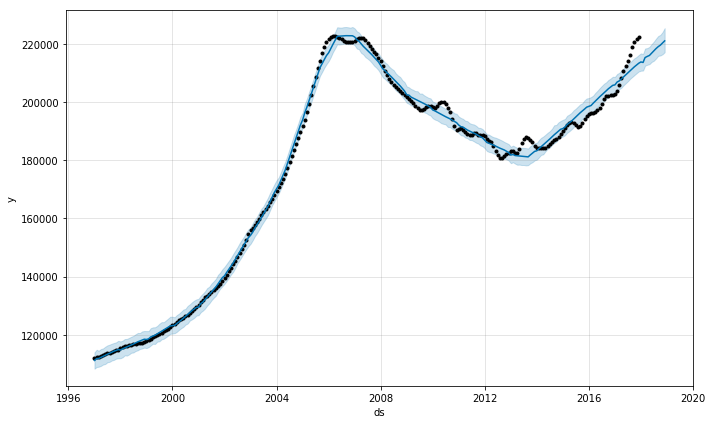

In [222]:
fig1 = m.plot(forecast)

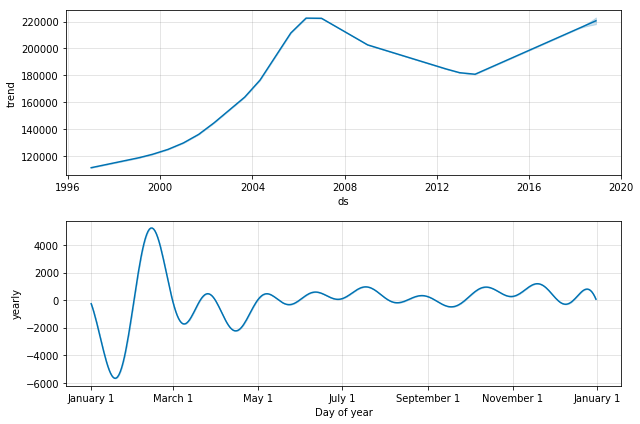

In [223]:
fig2 = m.plot_components(forecast)

In [228]:
ZipPivot.loc[:,1001]

0      111900.0
1      112300.0
2      112500.0
3      112800.0
4      113100.0
5      113300.0
6      113600.0
7      113800.0
8      114100.0
9      114300.0
10     114600.0
11     114900.0
12     115300.0
13     115700.0
14     116000.0
15     116200.0
16     116400.0
17     116500.0
18     116700.0
19     116800.0
20     117000.0
21     117100.0
22     117300.0
23     117500.0
24     117900.0
25     118300.0
26     118700.0
27     119100.0
28     119500.0
29     119900.0
         ...   
222    192000.0
223    191500.0
224    191700.0
225    192900.0
226    194100.0
227    195000.0
228    195700.0
229    196200.0
230    196200.0
231    196400.0
232    197300.0
233    198000.0
234    199200.0
235    200900.0
236    202000.0
237    202200.0
238    202500.0
239    202500.0
240    202600.0
241    203800.0
242    205900.0
243    208300.0
244    210500.0
245    212500.0
246    214100.0
247    216100.0
248    218700.0
249    220600.0
250    221600.0
251    222200.0
Name: 1001, Length: 252,

In [232]:
Zip=[]
DF201801=[]
DF201812=[]
ExpectedPrice=[]
ZipCodes=[1001,1002,1003]
for i in ZipCodes:
    Zip.append(i)
    i = ZipPivot.loc[:,i]
    #i = pd.melt(i, value_vars = ['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12'])
    i = i.rename(index=str, columns={'variable':'ds', 'value' : 'y'})
    bev_model=Prophet(interval_width=0.95)
    bev_model.fit(i)
    future_dates= bev_model.make_future_dataframe(periods=2, freq='M')
    forecast=bev_model.predict(future_dates)
    DF201801.append(forecast.iloc[-3][-1])
    DF201812.append(forecast.iloc[-3][-1]) 
    ExpectedPrice.append((forecast.iloc[-1],[-1]/forecast.iloc[-3][-1])-1)

TypeError: ignored

In [266]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ZipCodes=[1001,14760,1003]

for i in ZipCodes:
    Zip.append(i)
    df = ZipPivot.iloc[:,[1,i]]
    df=df.rename(index=str, columns={"Period": "ds", i : "y"}) 
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=13,freq="M")
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    DF201801.append(forecast.iloc[-12])
    DF201802.append(forecast.iloc[-11])
    DF201803.append(forecast.iloc[-10])
    DF201804.append(forecast.iloc[-9])
    DF201805.append(forecast.iloc[-8])
    DF201806.append(forecast.iloc[-7])
    DF201807.append(forecast.iloc[-6])
    DF201808.append(forecast.iloc[-5])
    DF201809.append(forecast.iloc[-4])
    DF201810.append(forecast.iloc[-3])
    DF201811.append(forecast.iloc[-2])
    ExpectedPrice.append(forecast.iloc[-1]) 

ValueError: ignored

In [271]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ZipCodes=[1001,14760,1003]

for i in ZipCodes:
    Zip.append(i)
    df = ZipPivot.iloc[:,[1,i]]
    df=df.rename(index=str, columns={"Period": "ds", i : "y"}) 
    m = Prophet()

TypeError: ignored

In [276]:
ZipPivot2= pd.pivot_table(ZillowBase, values=('1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12'), columns='ZipCode', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

ZipPivot2=pd.DataFrame.transpose(ZipPivot2)
ZipPivot2.head()

,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,...,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
ZipCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,111900.0,112300.0,112500.0,112800.0,113100.0,113300.0,113600.0,113800.0,114100.0,114300.0,114600.0,114900.0,115300.0,115700.0,116000.0,116200.0,116400.0,116500.0,116700.0,116800.0,117000.0,117100.0,117300.0,117500.0,117900.0,118300.0,118700.0,119100.0,119500.0,119900.0,120300.0,120700.0,121200.0,121600.0,122000.0,122600.0,123200.0,123800.0,124400.0,124900.0,...,186800.0,187400.0,188100.0,189100.0,190100.0,191200.0,192100.0,192900.0,193000.0,192700.0,192000.0,191500.0,191700.0,192900.0,194100.0,195000.0,195700.0,196200.0,196200.0,196400.0,197300.0,198000.0,199200.0,200900.0,202000.0,202200.0,202500.0,202500.0,202600.0,203800.0,205900.0,208300.0,210500.0,212500.0,214100.0,216100.0,218700.0,220600.0,221600.0,222200.0
1002,157600.0,158400.0,159100.0,159800.0,160500.0,161200.0,161800.0,162300.0,162900.0,163500.0,164100.0,164700.0,165300.0,166000.0,166400.0,166700.0,166800.0,166800.0,166700.0,166400.0,166200.0,166000.0,165800.0,165800.0,165900.0,166200.0,166500.0,166800.0,167100.0,167500.0,168000.0,168500.0,169200.0,170000.0,170800.0,171900.0,173100.0,174400.0,175600.0,176700.0,...,313600.0,315700.0,318500.0,321000.0,321500.0,321200.0,321600.0,322100.0,321600.0,319600.0,316500.0,314500.0,314500.0,314900.0,315200.0,315200.0,315000.0,314800.0,315200.0,314600.0,313000.0,312800.0,315400.0,317900.0,319100.0,319700.0,320600.0,321900.0,323600.0,325900.0,328500.0,330400.0,331900.0,333300.0,334300.0,335400.0,337700.0,340100.0,341700.0,343400.0
1005,105500.0,105800.0,106000.0,106200.0,106400.0,106700.0,106900.0,107100.0,107300.0,107600.0,107800.0,108300.0,108800.0,109300.0,109700.0,110100.0,110600.0,111000.0,111500.0,111900.0,112400.0,112900.0,113500.0,114300.0,115200.0,116100.0,117000.0,117900.0,118800.0,119800.0,120800.0,121800.0,122800.0,123800.0,125000.0,126300.0,127600.0,129000.0,130300.0,131600.0,...,179400.0,179300.0,179200.0,179400.0,179300.0,178200.0,176900.0,176100.0,176200.0,176600.0,176200.0,176100.0,176800.0,177200.0,177400.0,178500.0,180500.0,182200.0,183800.0,185900.0,188300.0,190000.0,191700.0,193200.0,195500.0,199200.0,203400.0,205800.0,206500.0,206900.0,207100.0,206200.0,205900.0,206300.0,206300.0,207300.0,209100.0,210500.0,211300.0,213100.0
1007,130800.0,131500.0,132200.0,132900.0,133600.0,134100.0,134500.0,134800.0,135000.0,135100.0,135200.0,135400.0,135700.0,136100.0,136400.0,136700.0,136900.0,137100.0,137200.0,137200.0,137100.0,137100.0,137100.0,137100.0,137400.0,137800.0,138100.0,138600.0,139100.0,139600.0,140100.0,140700.0,141400.0,142200.0,143100.0,144200.0,145600.0,147200.0,148800.0,150400.0,...,247500.0,248300.0,249500.0,250000.0,248600.0,246500.0,245700.0,245500.0,245600.0,246100.0,246800.0,247300.0,248200.0,249100.0,249300.0,250000.0,251000.0,252200.0,253900.0,255400.0,256000.0,256900.0,258100.0,258800.0,259500.0,260400.0,261000.0,261800.0,263200.0,264900.0,267000.0,268400.0,268600.0,267700.0,267200.0,267200.0,267700.0,268300.0,268900.0,268900.0
1008,115800.0,116000.0,116100.0,116200.0,116300.0,116400.0,116500.0,116700.0,116900.0,117000.0,117200.0,117300.0,117500.0,117700.0,117800.0,117900.0,117900.0,118000.0,118100.0,118200.0,118300.0,118400.0,118400.0,118400.0,118500.0,118600.0,118700.0,118700.0,118800.0,118900.0,119100.0,119400.0,119600.0,120000.0,120400.0,120700.0,121200.0,121800.0,122

In [336]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ZipCodes=[1001,14760,1005]

for i in ZipCodes:
    Zip.append(i)
    df = pd.DataFrame(data=ZipPivot2.loc[i,:])
    df['ds']=df.index
    df=df.rename(index=str, columns={i : "y"}) 
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=13,freq="M")
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    DF201801.append(forecast.iloc[-12])
    DF201802.append(forecast.iloc[-11])
    DF201803.append(forecast.iloc[-10])
    DF201804.append(forecast.iloc[-9])
    DF201805.append(forecast.iloc[-8])
    DF201806.append(forecast.iloc[-7])
    DF201807.append(forecast.iloc[-6])
    DF201808.append(forecast.iloc[-5])
    DF201809.append(forecast.iloc[-4])
    DF201810.append(forecast.iloc[-3])
    DF201811.append(forecast.iloc[-2])
    ExpectedPrice.append(forecast.iloc[-1]) 
    DF201801.append(i)
    DF201802.append(i)
    DF201803.append(i)
    DF201804.append(i)
    DF201805.append(i)
    DF201806.append(i)
    DF201807.append(i)
    DF201808.append(i)
    DF201809.append(i)
    DF201810.append(i)
    DF201811.append(i)
    ExpectedPrice.append(i)



/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated an

In [335]:
print(ExpectedPrice)

[ds                            2018-12-31 00:00:00
trend                                      221223
yhat_lower                                 217220
yhat_upper                                 225435
trend_lower                                218224
trend_upper                                223929
additive_terms                            129.309
additive_terms_lower                      129.309
additive_terms_upper                      129.309
yearly                                    129.309
yearly_lower                              129.309
yearly_upper                              129.309
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                       221352
Name: 264, dtype: object, ds                            2018-12-31 00:00:00
trend                                       61998
yhat_lower                                61066.1
yhat_upper             

In [0]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ZipCodes=[1001,14760,1005]

for i in ZipCodes:
    Zip.append(i)
    df = pd.DataFrame(data=ZipPivot2.loc[i,:])
    df['ds']=df.index
#    df=pd.melt(df)
    df=df.rename(index=str, columns={i : "y"}) 


In [322]:
df

,y,ds
1997-01,105500.0,1997-01
1997-02,105800.0,1997-02
1997-03,106000.0,1997-03
1997-04,106200.0,1997-04
1997-05,106400.0,1997-05
1997-06,106700.0,1997-06
1997-07,106900.0,1997-07
1997-08,107100.0,1997-08
1997-09,107300.0,1997-09
1997-10,107600.0,1997-10


In [0]:
Zip=[]
DF201801=[]
DF201801=[]
DF201802=[]
DF201803=[]
DF201804=[]
DF201805=[]
DF201806=[]
DF201807=[]
DF201808=[]
DF201809=[]
DF201810=[]
DF201811=[]
DF201812=[]
ExpectedPrice=[]
ZipCodes=[1001,14760,1005]

for i in ZipCodes:
    Zip.append(i)
    df = ZipPivot2.loc[i,:]


In [311]:
df.describe

<bound method NDFrame.describe of 1997-01    105500.0
1997-02    105800.0
1997-03    106000.0
1997-04    106200.0
1997-05    106400.0
1997-06    106700.0
1997-07    106900.0
1997-08    107100.0
1997-09    107300.0
1997-10    107600.0
1997-11    107800.0
1997-12    108300.0
1998-01    108800.0
1998-02    109300.0
1998-03    109700.0
1998-04    110100.0
1998-05    110600.0
1998-06    111000.0
1998-07    111500.0
1998-08    111900.0
1998-09    112400.0
1998-10    112900.0
1998-11    113500.0
1998-12    114300.0
1999-01    115200.0
1999-02    116100.0
1999-03    117000.0
1999-04    117900.0
1999-05    118800.0
1999-06    119800.0
             ...   
2015-07    176200.0
2015-08    176100.0
2015-09    176800.0
2015-10    177200.0
2015-11    177400.0
2015-12    178500.0
2016-01    180500.0
2016-02    182200.0
2016-03    183800.0
2016-04    185900.0
2016-05    188300.0
2016-06    190000.0
2016-07    191700.0
2016-08    193200.0
2016-09    195500.0
2016-10    199200.0
2016-11    203400.0
2016-1

In [303]:
ZipPivot2.loc[1005,:]


1997-01    105500.0
1997-02    105800.0
1997-03    106000.0
1997-04    106200.0
1997-05    106400.0
1997-06    106700.0
1997-07    106900.0
1997-08    107100.0
1997-09    107300.0
1997-10    107600.0
1997-11    107800.0
1997-12    108300.0
1998-01    108800.0
1998-02    109300.0
1998-03    109700.0
1998-04    110100.0
1998-05    110600.0
1998-06    111000.0
1998-07    111500.0
1998-08    111900.0
1998-09    112400.0
1998-10    112900.0
1998-11    113500.0
1998-12    114300.0
1999-01    115200.0
1999-02    116100.0
1999-03    117000.0
1999-04    117900.0
1999-05    118800.0
1999-06    119800.0
             ...   
2015-07    176200.0
2015-08    176100.0
2015-09    176800.0
2015-10    177200.0
2015-11    177400.0
2015-12    178500.0
2016-01    180500.0
2016-02    182200.0
2016-03    183800.0
2016-04    185900.0
2016-05    188300.0
2016-06    190000.0
2016-07    191700.0
2016-08    193200.0
2016-09    195500.0
2016-10    199200.0
2016-11    203400.0
2016-12    205800.0
2017-01    206500.0


In [296]:
ZipPivot2.head()

,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,...,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
ZipCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,111900.0,112300.0,112500.0,112800.0,113100.0,113300.0,113600.0,113800.0,114100.0,114300.0,114600.0,114900.0,115300.0,115700.0,116000.0,116200.0,116400.0,116500.0,116700.0,116800.0,117000.0,117100.0,117300.0,117500.0,117900.0,118300.0,118700.0,119100.0,119500.0,119900.0,120300.0,120700.0,121200.0,121600.0,122000.0,122600.0,123200.0,123800.0,124400.0,124900.0,...,186800.0,187400.0,188100.0,189100.0,190100.0,191200.0,192100.0,192900.0,193000.0,192700.0,192000.0,191500.0,191700.0,192900.0,194100.0,195000.0,195700.0,196200.0,196200.0,196400.0,197300.0,198000.0,199200.0,200900.0,202000.0,202200.0,202500.0,202500.0,202600.0,203800.0,205900.0,208300.0,210500.0,212500.0,214100.0,216100.0,218700.0,220600.0,221600.0,222200.0
1002,157600.0,158400.0,159100.0,159800.0,160500.0,161200.0,161800.0,162300.0,162900.0,163500.0,164100.0,164700.0,165300.0,166000.0,166400.0,166700.0,166800.0,166800.0,166700.0,166400.0,166200.0,166000.0,165800.0,165800.0,165900.0,166200.0,166500.0,166800.0,167100.0,167500.0,168000.0,168500.0,169200.0,170000.0,170800.0,171900.0,173100.0,174400.0,175600.0,176700.0,...,313600.0,315700.0,318500.0,321000.0,321500.0,321200.0,321600.0,322100.0,321600.0,319600.0,316500.0,314500.0,314500.0,314900.0,315200.0,315200.0,315000.0,314800.0,315200.0,314600.0,313000.0,312800.0,315400.0,317900.0,319100.0,319700.0,320600.0,321900.0,323600.0,325900.0,328500.0,330400.0,331900.0,333300.0,334300.0,335400.0,337700.0,340100.0,341700.0,343400.0
1005,105500.0,105800.0,106000.0,106200.0,106400.0,106700.0,106900.0,107100.0,107300.0,107600.0,107800.0,108300.0,108800.0,109300.0,109700.0,110100.0,110600.0,111000.0,111500.0,111900.0,112400.0,112900.0,113500.0,114300.0,115200.0,116100.0,117000.0,117900.0,118800.0,119800.0,120800.0,121800.0,122800.0,123800.0,125000.0,126300.0,127600.0,129000.0,130300.0,131600.0,...,179400.0,179300.0,179200.0,179400.0,179300.0,178200.0,176900.0,176100.0,176200.0,176600.0,176200.0,176100.0,176800.0,177200.0,177400.0,178500.0,180500.0,182200.0,183800.0,185900.0,188300.0,190000.0,191700.0,193200.0,195500.0,199200.0,203400.0,205800.0,206500.0,206900.0,207100.0,206200.0,205900.0,206300.0,206300.0,207300.0,209100.0,210500.0,211300.0,213100.0
1007,130800.0,131500.0,132200.0,132900.0,133600.0,134100.0,134500.0,134800.0,135000.0,135100.0,135200.0,135400.0,135700.0,136100.0,136400.0,136700.0,136900.0,137100.0,137200.0,137200.0,137100.0,137100.0,137100.0,137100.0,137400.0,137800.0,138100.0,138600.0,139100.0,139600.0,140100.0,140700.0,141400.0,142200.0,143100.0,144200.0,145600.0,147200.0,148800.0,150400.0,...,247500.0,248300.0,249500.0,250000.0,248600.0,246500.0,245700.0,245500.0,245600.0,246100.0,246800.0,247300.0,248200.0,249100.0,249300.0,250000.0,251000.0,252200.0,253900.0,255400.0,256000.0,256900.0,258100.0,258800.0,259500.0,260400.0,261000.0,261800.0,263200.0,264900.0,267000.0,268400.0,268600.0,267700.0,267200.0,267200.0,267700.0,268300.0,268900.0,268900.0
1008,115800.0,116000.0,116100.0,116200.0,116300.0,116400.0,116500.0,116700.0,116900.0,117000.0,117200.0,117300.0,117500.0,117700.0,117800.0,117900.0,117900.0,118000.0,118100.0,118200.0,118300.0,118400.0,118400.0,118400.0,118500.0,118600.0,118700.0,118700.0,118800.0,118900.0,119100.0,119400.0,119600.0,120000.0,120400.0,120700.0,121200.0,121800.0,122